In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
#read_file
filename="covtype.csv"
df=pd.read_csv(filename,skiprows=range(1,550913))
# df=pd.read_csv(filename)

df
# dataset_label=dataset[['Cover_Type']].values 
# dataset_label
# print(type(dataset_label))


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3250,116,7,391,-80,642,233,233,133,3376,...,1,0,0,0,0,0,0,0,0,2
1,3248,130,4,417,-82,624,226,237,145,3347,...,1,0,0,0,0,0,0,0,0,2
2,3247,243,3,443,-83,607,213,242,166,3318,...,0,0,0,0,0,0,0,0,0,2
3,3251,274,14,470,-79,592,182,243,200,3289,...,0,0,0,0,0,0,0,0,0,2
4,3262,281,21,497,-68,577,157,237,217,3260,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30095,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
30096,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
30097,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
30098,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [57]:
#check missing value and column change
print(df[df.isnull().values==True])
print("no missing values\n")
#converge soil_Type1-40 to soil Type and Wilderness_Area1-4 to Wilderness_Area
list_data1=[]
list_data2=[]
df_temp=pd.DataFrame(columns=['Wilderness_Area','Soil_Type'])# 10-13 14-53
for row in df.values:
    data=[]
    for i in range(10,14):
        if row[i]!=0:
            list_data1.append(i-9)
    for i in range(14,54):
        if row[i]!=0:
            list_data2.append(i-13)
    # temp=pd.Series(data=data,index=index)
    row=np.append(row,data)
    
df.insert(55,'Wilderness_Area',list_data1)
df.insert(56,'Soil_Type',list_data2)
# print(df_temp)
df.drop(df.columns[[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53]],axis=1,inplace=True)

# df
            

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 55 columns]
no missing values



Cover_Type
2             15028
3              7696
1              4769
6              2516
7                51
5                40
dtype: int64


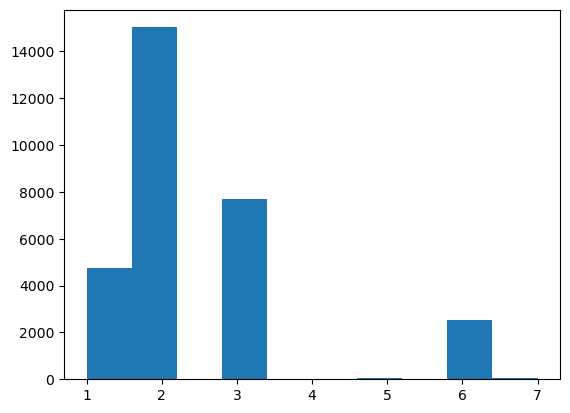

In [58]:
#normalization
from sklearn.preprocessing import MinMaxScaler
df_label=df[['Cover_Type']]
print(df_label.value_counts())
df_label=df_label.values
df=df.drop(columns=['Cover_Type'])
scaler = MinMaxScaler()          
scaler = scaler.fit(df)          
df = scaler.transform(df)
def distribution(label):
    plt.figure()
    plt.hist(label)
    plt.show()

distribution(df_label)
# df

In [52]:
#train and get result
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df,df_label.ravel(),test_size=0.3)

rfc=RandomForestClassifier(random_state=0)
rfc=rfc.fit(Xtrain,Ytrain)
score_r=rfc.score(Xtest,Ytest)

clf=SVC(decision_function_shape='ovo')
clf.fit(Xtrain,Ytrain)
score_c=clf.score(Xtest,Ytest)

knn=KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)
score_k=knn.score(Xtest,Ytest)

lr=LogisticRegression()
lr.fit(Xtrain,Ytrain)
score_l=lr.score(Xtest,Ytest)

print(f"Random Forest:{score_r:.3f}")
print(f"SVM:{score_c:.3f}")
print(f"KNN:{score_k:.3f}")
print(f"Logistic Regression:{score_l:.3f}")

# print(rfc.predict(Xtest))
# print(Ytest)

Random Forest:0.968
SVM:0.875
KNN:0.945
Logistic Regression:0.809


D:\Anaconda3\envs\statistic\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.967109634551495 181


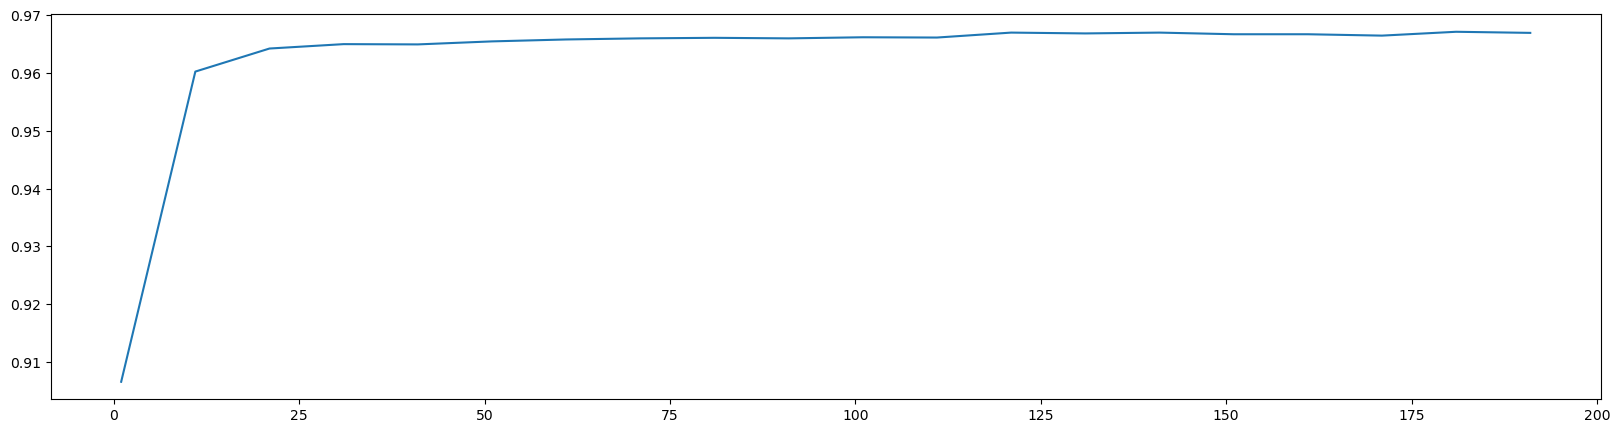

In [60]:
#adjust parameter
from sklearn.model_selection import cross_val_score
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.967109634551495 181


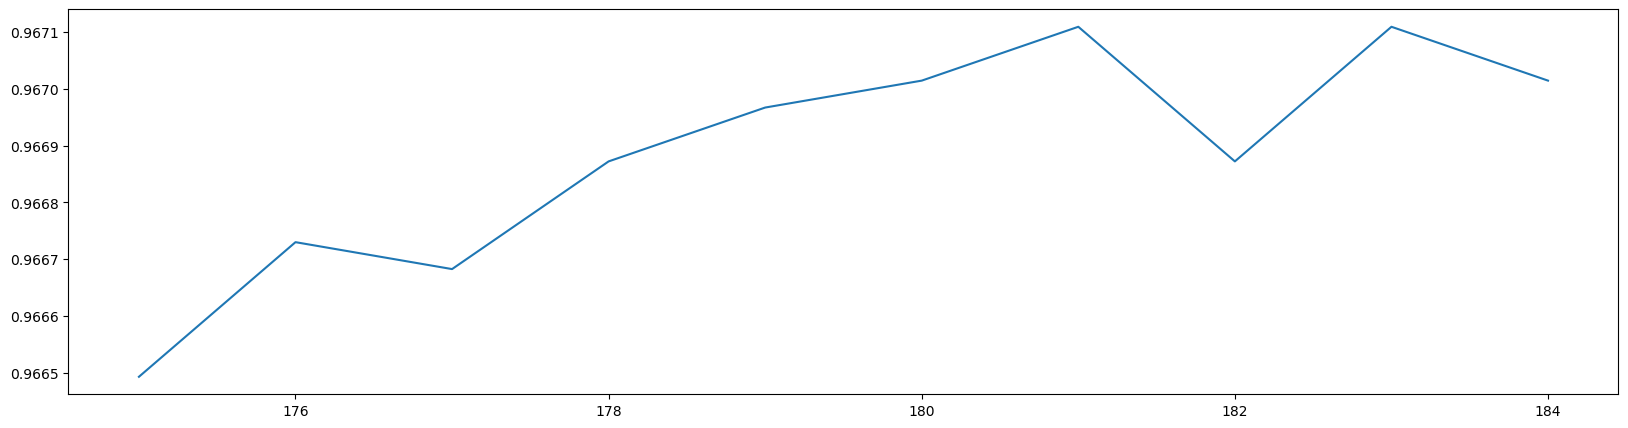

In [62]:
scorel = []
for i in range(175,185):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)

print(max(scorel),([*range(175,185)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(175,185),scorel)
plt.show()